# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Read data

In [2]:
df = pd.read_csv("video games sales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2 style="font-size:28px;">📊 Dataset Column Descriptions</h2>

<table style="font-size:14px; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="text-align: left; padding: 15px;"><b>Column Name</b></th>
      <th style="text-align: left; padding: 10px;"><b>Description</b></th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="padding: 10px;"><b>Rank</b></td><td style="padding: 10px;">Ranking of overall sales</td></tr>
    <tr><td style="padding: 10px;"><b>Name</b></td><td style="padding: 10px;">The game's name</td></tr>
    <tr><td style="padding: 10px;"><b>Platform</b></td><td style="padding: 10px;">Platform of the game's release (e.g., PC, PS4)</td></tr>
    <tr><td style="padding: 10px;"><b>Year</b></td><td style="padding: 10px;">Year of the game's release</td></tr>
    <tr><td style="padding: 10px;"><b>Genre</b></td><td style="padding: 10px;">Genre of the game</td></tr>
    <tr><td style="padding: 10px;"><b>Publisher</b></td><td style="padding: 10px;">Publisher of the game</td></tr>
    <tr><td style="padding: 10px;"><b>NA_Sales</b></td><td style="padding: 10px;">Sales in North America (in millions)</td></tr>
    <tr><td style="padding: 10px;"><b>EU_Sales</b></td><td style="padding: 10px;">Sales in Europe (in millions)</td></tr>
    <tr><td style="padding: 10px;"><b>JP_Sales</b></td><td style="padding: 10px;">Sales in Japan (in millions)</td></tr>
    <tr><td style="padding: 10px;"><b>Other_Sales</b></td><td style="padding: 10px;">Sales in the rest of the world (in millions)</td></tr>
    <tr><td style="padding: 10px;"><b>Global_Sales</b></td><td style="padding: 10px;">Total worldwide sales (sum of NA, EU, JP, and Other Sales)</td></tr>
  </tbody>
</table>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Handling NULLs

In [6]:
df.isna().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df.isnull().sum().mean()

29.90909090909091

**Dropping NULLs is a best choice**

In [8]:
df.dropna(subset = ["Year","Publisher"],inplace = True)

In [9]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Check for Duplicates

In [10]:
df.duplicated().sum()

0

# Handling Data Types

In [11]:
df["Year"] = df["Year"].astype(int)

# Detecting Outliers

In [12]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [13]:
sales = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

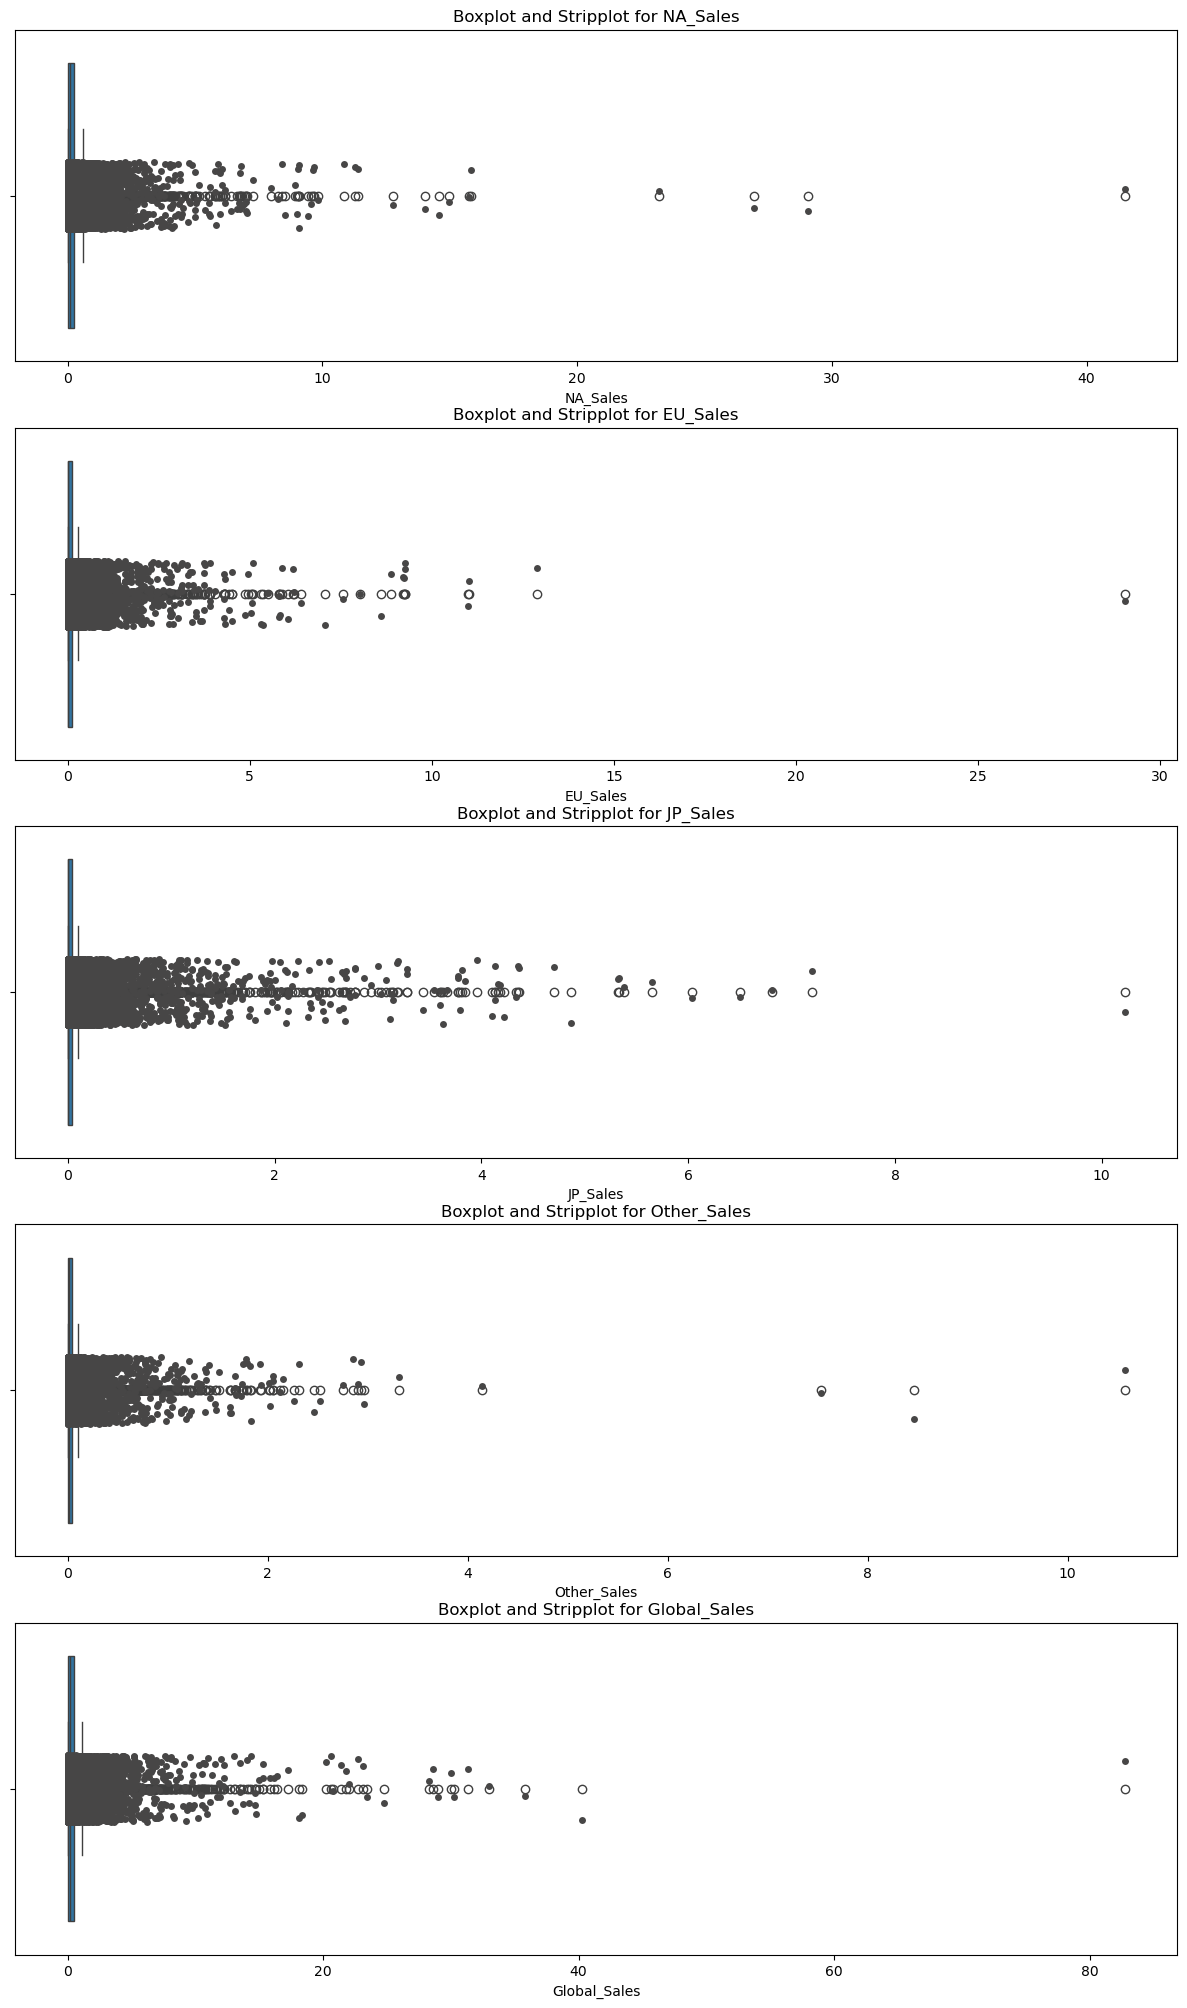

In [14]:
fig,axes = plt.subplots(len(sales),1,figsize = (15,5*len(sales)))
for i, col in enumerate(sales):
    sns.boxplot(x=col, data=df, ax=axes[i])
    sns.stripplot(x=col, data=df, color="#474646", ax=axes[i])
    axes[i].set_title(f"Boxplot and Stripplot for {col}")
    axes[i].set_xlabel(col)

In [15]:
for i in sales:
    print(f"Min value is of {i} is {df[i].min()} and max value is {df[i].max()}")

Min value is of NA_Sales is 0.0 and max value is 41.49
Min value is of EU_Sales is 0.0 and max value is 29.02
Min value is of JP_Sales is 0.0 and max value is 10.22
Min value is of Other_Sales is 0.0 and max value is 10.57
Min value is of Global_Sales is 0.01 and max value is 82.74


**For all these Sales `The range is realistic` Where there are Successful games that achieved high sales and vice versa**

# EDA

**Before making EDA i will make transform to a sales column to make it Clear in plotting**

In [16]:
for i in sales:
    df[i] = np.log1p(df[i])

**Univariate Analysis**

In [17]:
df["Name"].value_counts()

Name
Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Cars                            8
                               ..
PGA Tour 96                     1
Game & Wario                    1
Angry Birds                     1
Shadow Hearts: Covenant         1
Know How 2                      1
Name: count, Length: 11325, dtype: int64

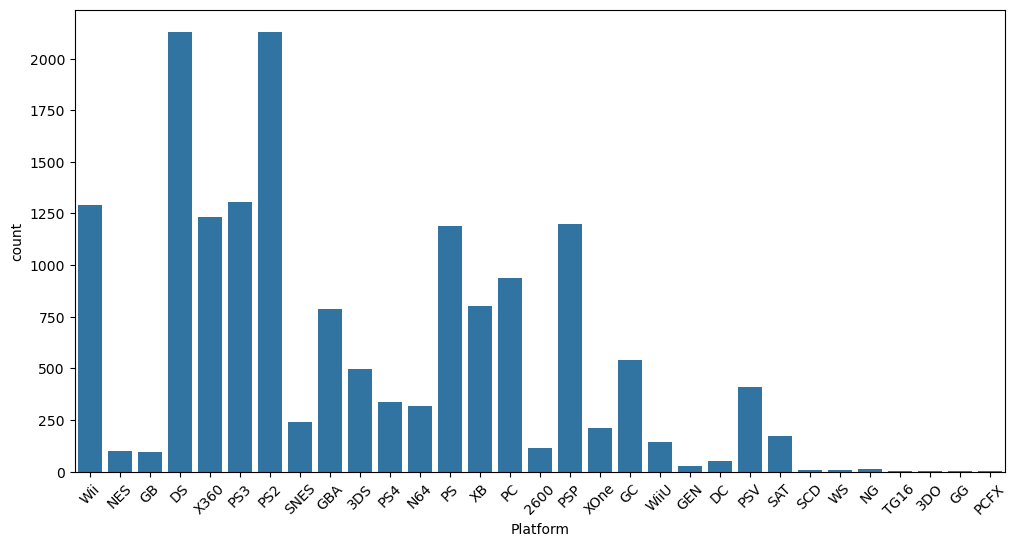

In [18]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x = "Platform",data = df)
plt.xticks(rotation=45)
plt.show()

**Getting The Most used Platform**

In [19]:
most_common_Platform = df["Platform"].value_counts().idxmax()
max_count = df["Platform"].value_counts().max()
print(f"Most common Platform: {most_common_Platform} (Count: {max_count})")

Most common Platform: DS (Count: 2131)


**As Shown The most platform used is `DS`**

---

- ## 1- What genre games have been made the most?

In [ ]:
df["Genre"].value_counts()

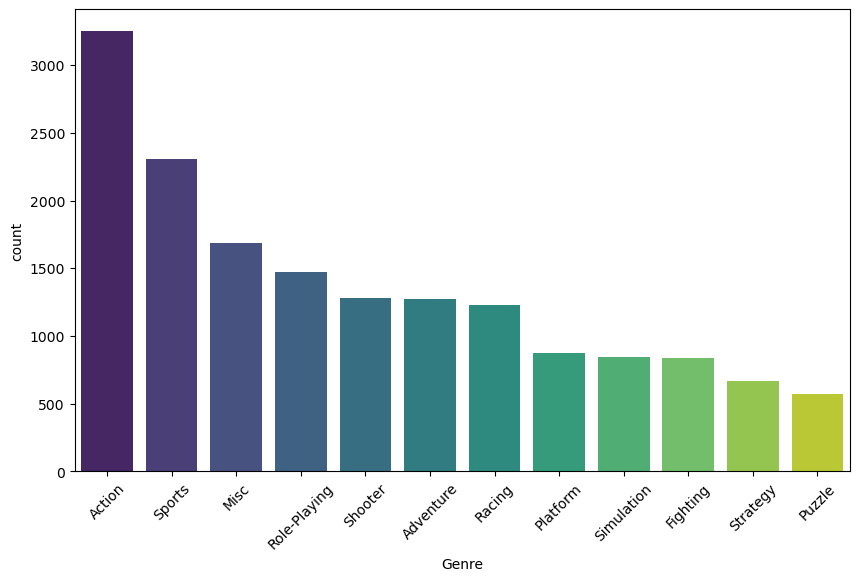

In [58]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data = df,x = "Genre",order = df['Genre'].value_counts().index,palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [22]:
most_common_Genre = df["Genre"].value_counts().idxmax()
max_count_G = df["Genre"].value_counts().max()
print(f"Most common Genre: {most_common_Genre} (Count: {max_count_G})")

Most common Genre: Action (Count: 3251)


**Here The Most Type of games distributed is `Action`**

---

In [23]:
df["Publisher"].value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

**The Most Common `Publisher` is `'Electronic Arts'`**

In [24]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,3.749269,3.401864,1.562346,2.247072,4.427717
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,3.403860,1.521699,2.055405,0.570980,3.719409
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,2.824351,2.630449,1.566530,1.460938,3.606041
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,2.818398,2.485740,1.453953,1.376244,3.526361
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,2.507157,2.291524,2.417698,0.693147,3.477232


In [25]:
df["Publisher"].mode()[0]

'Electronic Arts'

**the biggest publisher is `Electronic Arts` with `1339` games**

------

In [26]:
df["NA_Sales"].describe()

count    16291.000000
mean         0.175573
std          0.282503
min          0.000000
25%          0.000000
50%          0.076961
75%          0.215111
max          3.749269
Name: NA_Sales, dtype: float64

<Axes: xlabel='NA_Sales', ylabel='Count'>

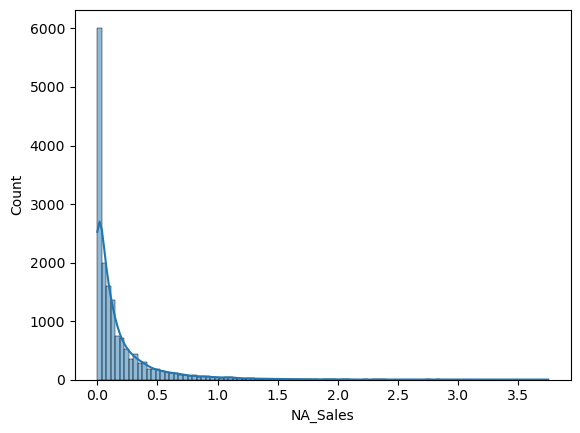

In [27]:
sns.histplot(df["NA_Sales"],kde=True,bins=100)

**Most of games in North America Didn't make much profit, as 25% of games didn't make any profits and 50% of games make only .07 million**

---

In [28]:
df["EU_Sales"].describe()

count    16291.000000
mean         0.104257
std          0.214374
min          0.000000
25%          0.000000
50%          0.019803
75%          0.104360
max          3.401864
Name: EU_Sales, dtype: float64

<Axes: xlabel='EU_Sales', ylabel='Count'>

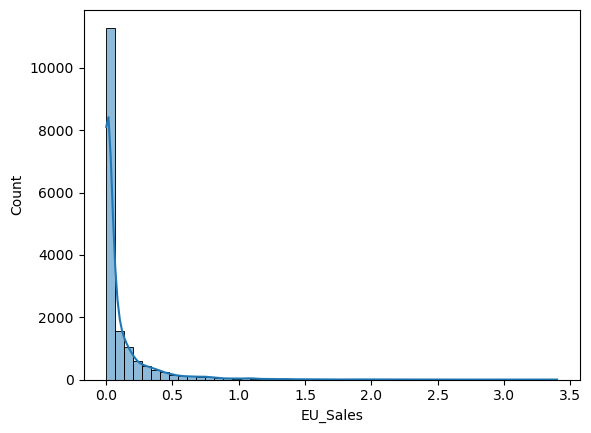

In [29]:
sns.histplot(df["EU_Sales"],kde=True,bins=50)

**Also Sales in Europe didn't make big sales as 25% of sales = 0 and median = .02**

---

In [30]:
df["JP_Sales"].describe()

count    16291.000000
mean         0.057599
std          0.161205
min          0.000000
25%          0.000000
50%          0.000000
75%          0.039221
max          2.417698
Name: JP_Sales, dtype: float64

<Axes: xlabel='JP_Sales', ylabel='Count'>

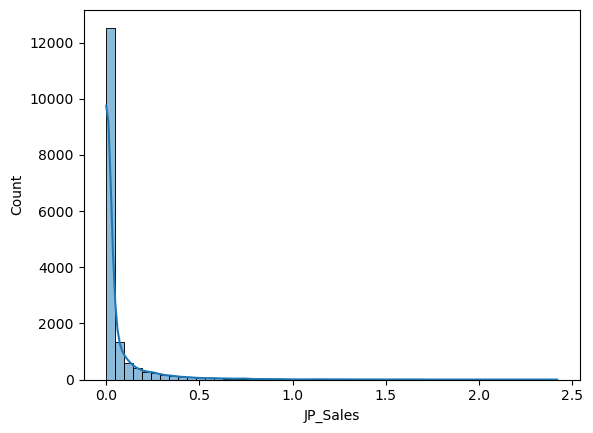

In [31]:
sns.histplot(df["JP_Sales"],kde = True,bins = 50)

**50% of games didn't make any profits, so no big profits can make in this area**

----

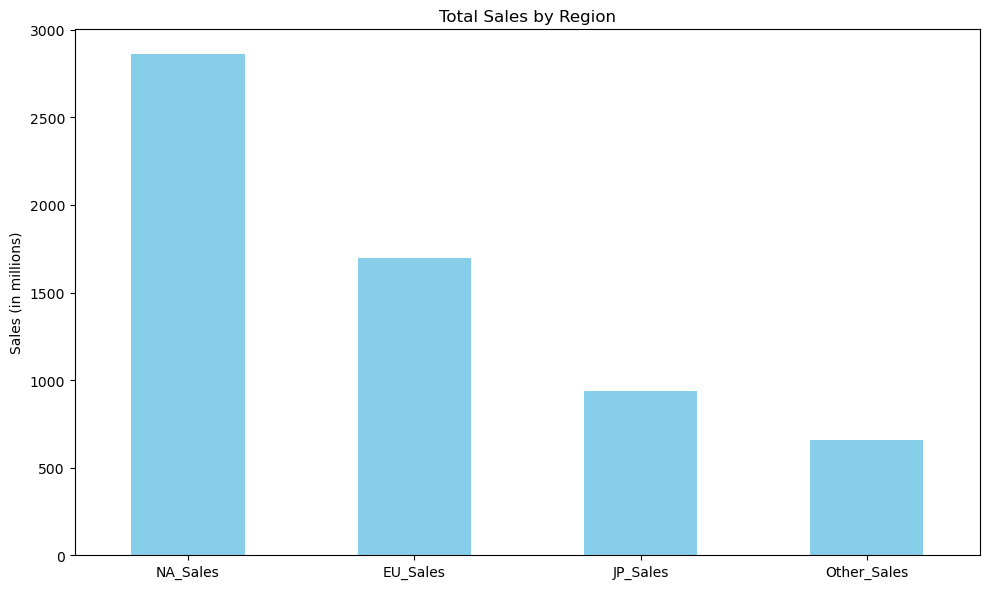

In [32]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(10,6))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.ylabel("Sales (in millions)")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

# Bivariate Analysis

- **Getting the highest selling game in each Region**

In [33]:
for i in sales:
    print(f"Highest selling game in {i} is {df.loc[df[i].idxmax(),["Name"]][0]}")

Highest selling game in NA_Sales is Wii Sports
Highest selling game in EU_Sales is Wii Sports
Highest selling game in JP_Sales is Pokemon Red/Pokemon Blue
Highest selling game in Other_Sales is Grand Theft Auto: San Andreas
Highest selling game in Global_Sales is Wii Sports


- **Getting the highest Genre of games in each Region**

In [34]:
for i in sales:
    print(f"Highest Genre of games  in {i} is {df.loc[df[i].idxmax(),["Genre"]][0]}")

Highest Genre of games  in NA_Sales is Sports
Highest Genre of games  in EU_Sales is Sports
Highest Genre of games  in JP_Sales is Role-Playing
Highest Genre of games  in Other_Sales is Action
Highest Genre of games  in Global_Sales is Sports


- **Getting the Largest Publisher of games in each Region**

In [35]:
for i in sales:
    print(f"Largest Publisher of games  in {i} is {df.loc[df[i].idxmax(),["Publisher"]][0]}")

Largest Publisher of games  in NA_Sales is Nintendo
Largest Publisher of games  in EU_Sales is Nintendo
Largest Publisher of games  in JP_Sales is Nintendo
Largest Publisher of games  in Other_Sales is Take-Two Interactive
Largest Publisher of games  in Global_Sales is Nintendo


- **TOP 3 Publishers by Global Sales**

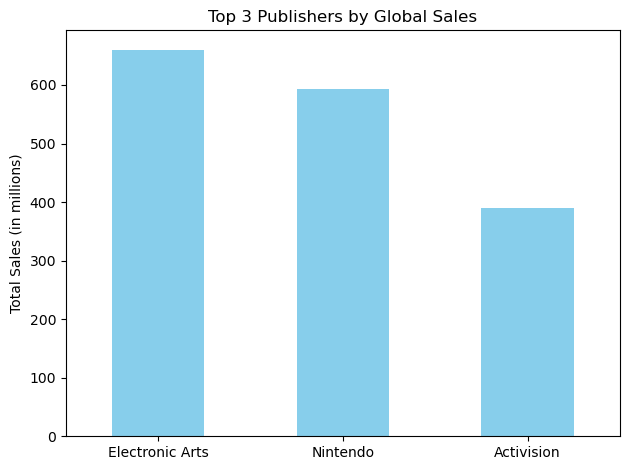

In [36]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum()

top3_sales = publisher_sales.sort_values(ascending=False).head(3)
top3_sales.plot(kind='bar', color='skyblue')

plt.title('Top 3 Publishers by Global Sales')
plt.ylabel('Total Sales (in millions)')
plt.xlabel("")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

**As shown The Sales in North America `Nintendo` is the most famous with wii sports**

---

## Sales Over Time

In [46]:
def trend_over_time(year,col):
    yearly_sales = df.groupby(year)[col].sum()
    yearly_sales.plot(title=f"{col} Over Time", figsize=(10,5))
    plt.ylabel(f"{col} (Millions)")
    plt.xlabel("")
    plt.grid(True)
    plt.show()

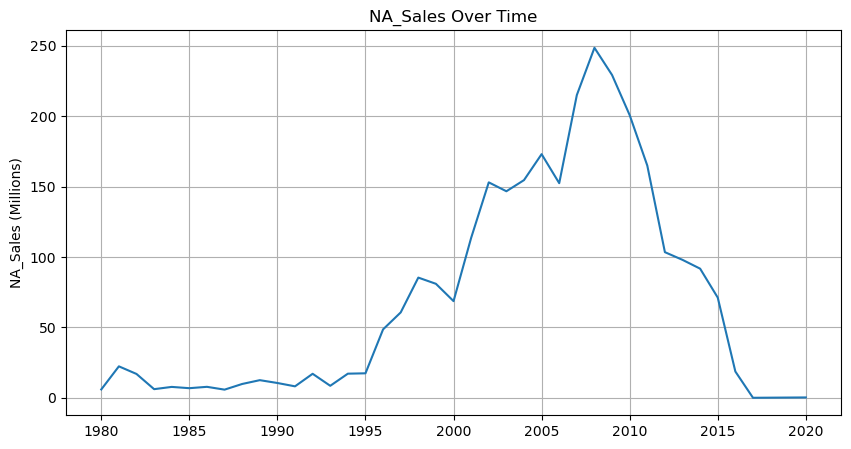

In [52]:
trend_over_time("Year",'NA_Sales')

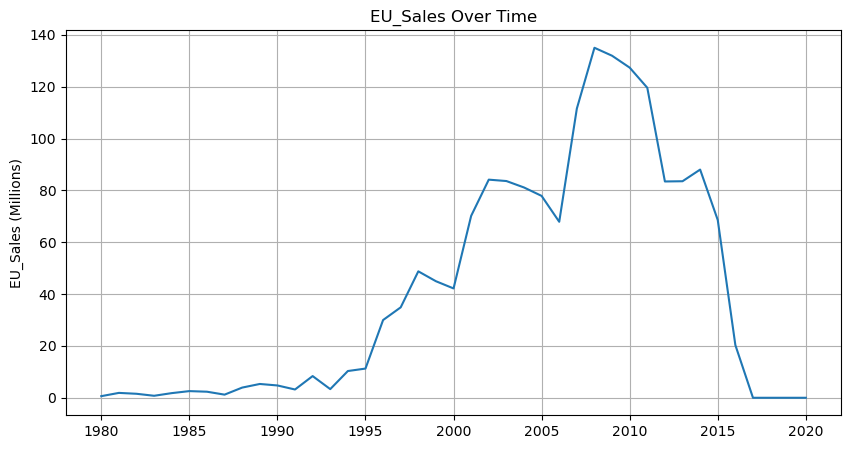

In [48]:
trend_over_time("Year",'EU_Sales')

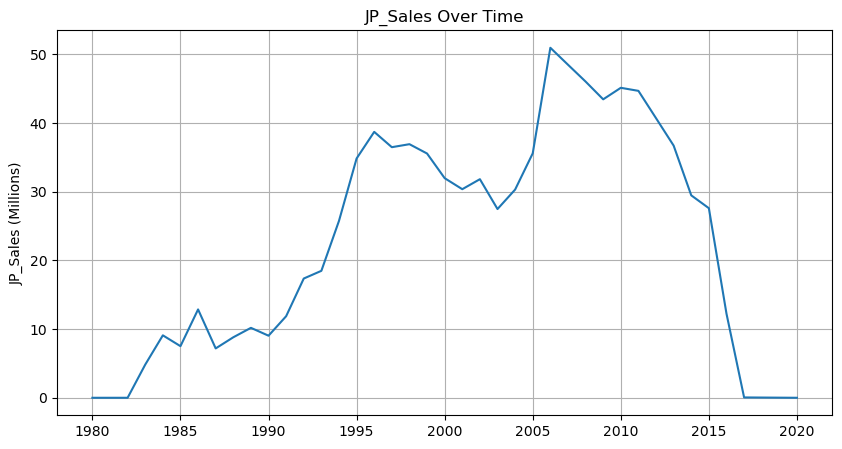

In [49]:
trend_over_time("Year",'JP_Sales')

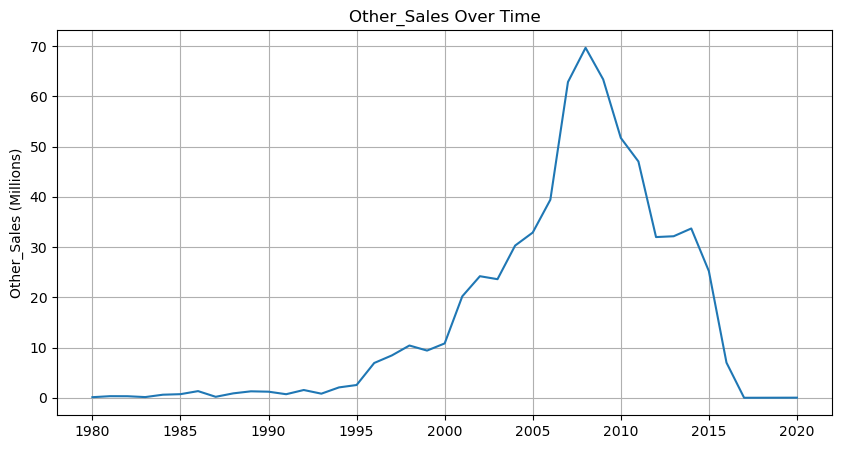

In [50]:
trend_over_time("Year",'Other_Sales')

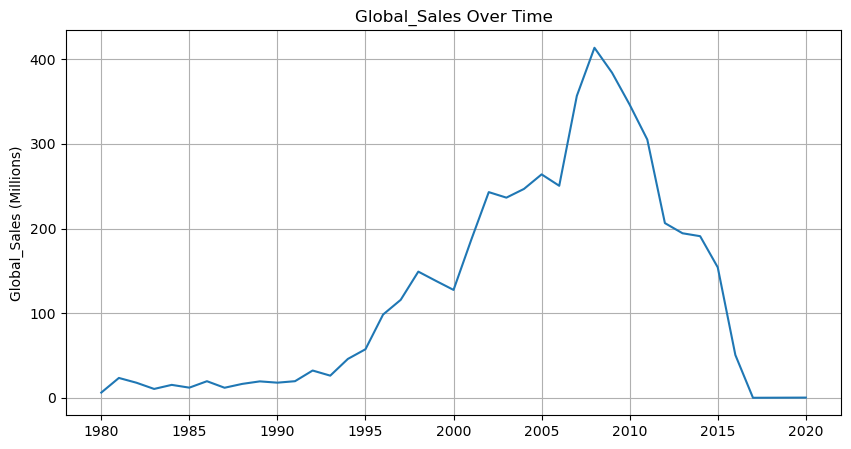

In [51]:
trend_over_time("Year",'Global_Sales')

 ## Which Year had the highest sales 

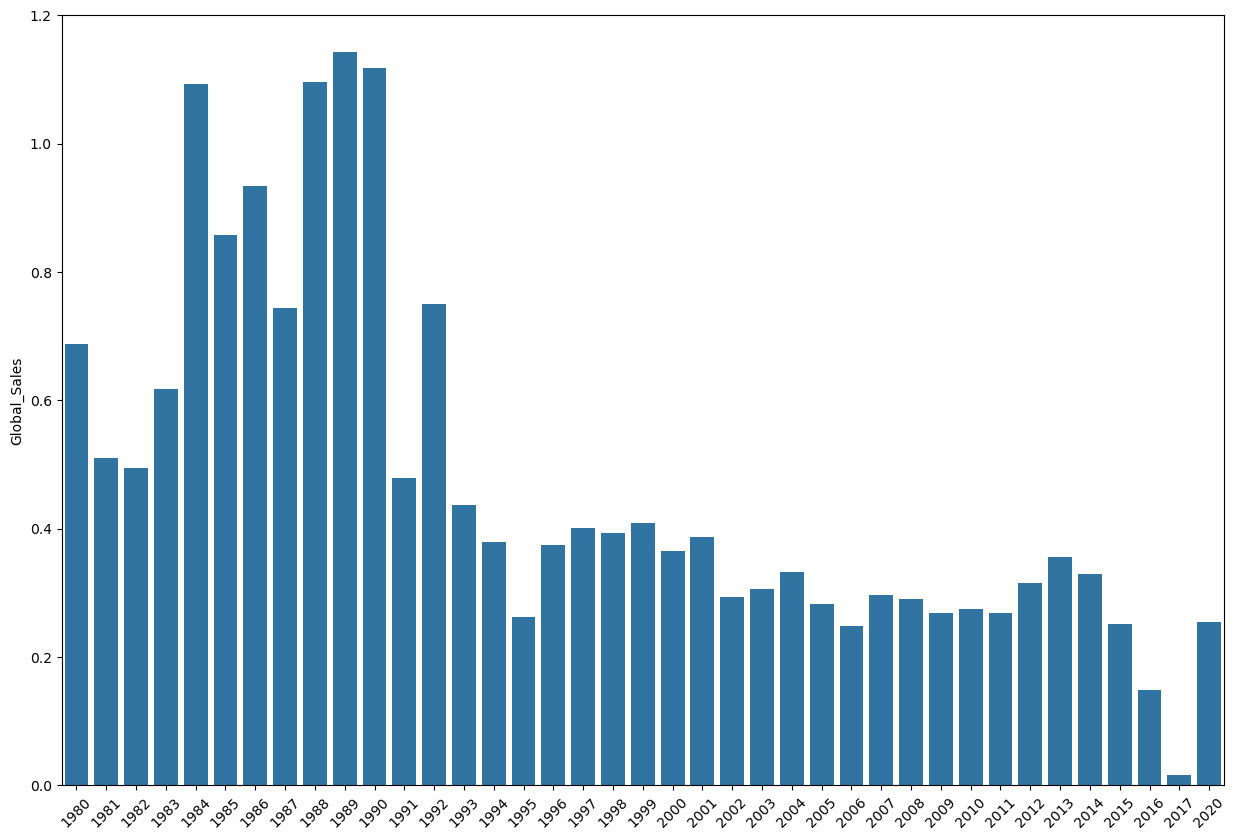

In [72]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=df,ci = None)
plt.xticks(rotation=45)
plt.xlabel("")
plt.show()

**Thank You**